In [1]:
import matplotlib.pyplot as plt

import qiskit.pulse as pulse
from qiskit.pulse import Schedule, Gaussian, GaussianSquare, Drag, Play, DriveChannel, ShiftPhase, ShiftFrequency
from qiskit.visualization.pulse.qcstyle import SchedStyle
from qiskit_ode.converters import InstructionToSignals

In [2]:
sched = Schedule(name='Schedule')
sched += Play(Drag(duration=20, amp=0.5, sigma=4, beta=0.5), DriveChannel(0))
sched += ShiftPhase(1.0, DriveChannel(0))
sched += Play(Drag(duration=20, amp=0.5, sigma=4, beta=0.5), DriveChannel(0))
sched += ShiftFrequency(0.5, DriveChannel(0))
sched += Play(GaussianSquare(duration=200, amp=0.3, sigma=4, width=150), DriveChannel(0))
sched = sched.insert(0, Play(GaussianSquare(duration=200, amp=0.3, sigma=4, width=150), DriveChannel(1)))

In [3]:
len(GaussianSquare(duration=200, amp=0.3, sigma=4, width=150).get_waveform().samples)

200

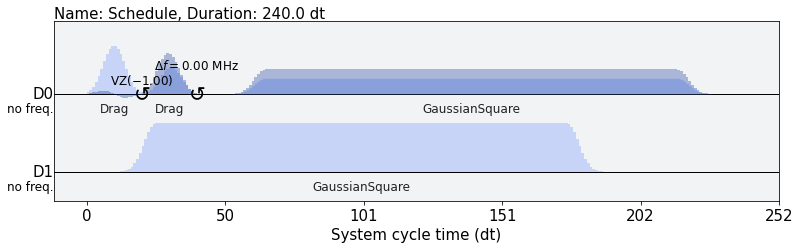

In [4]:
sched.draw()

In [5]:
converter = InstructionToSignals(dt=1, carriers=None)

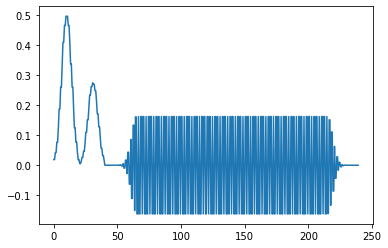

In [6]:
converter.get_signals(sched)[0].draw(0, 239, 400)

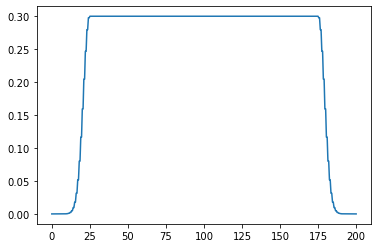

In [7]:
converter.get_signals(sched)[1].draw(0, 200, 400)

### Creating output from Arbitrary Waveform Generators

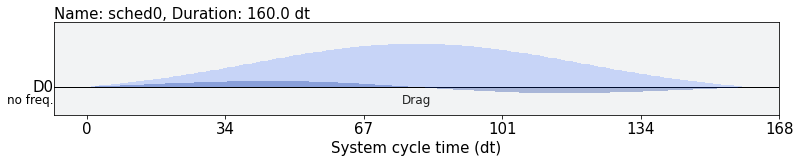

In [8]:
with pulse.build() as sched:
    pulse.play(Drag(160, 0.5, 40, 10.0), DriveChannel(0))
    
sched.draw()

In [9]:
converter = InstructionToSignals(dt=1, carriers=None)
signals = converter.get_signals(sched)

In [10]:
signals_awg = converter.get_awg_signals(signals, if_modulation=0.04)

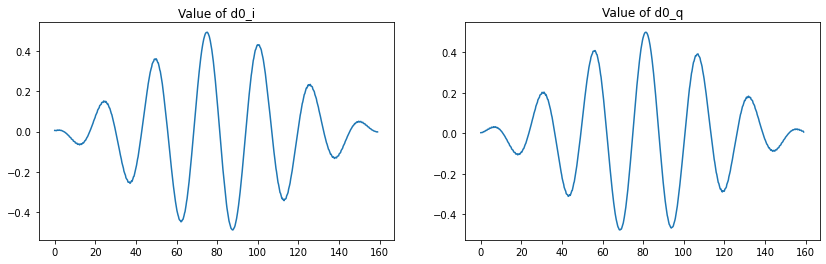

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
for idx in [0, 1]:
    signals_awg[idx].draw(0, 159, 640, axis=axs[idx])
    axs[idx].set_title(f'Value of {signals_awg[idx].name}')

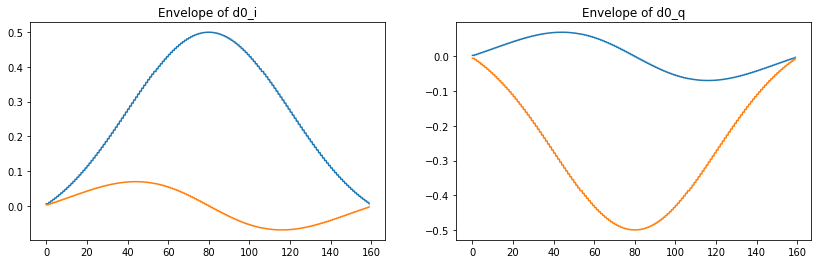

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
for idx in [0, 1]:
    signals_awg[idx].draw(0, 159, 640, function='envelope', axis=axs[idx])
    axs[idx].set_title(f'Envelope of {signals_awg[idx].name}')